In [1]:
#import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import datasets 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import * # import all libraries under sklearn.metrics

In [2]:
#Load data
sales = pd.read_csv('sales.csv')
advertising = pd.read_csv('advertising.csv')
superstore = pd.read_csv('Superstore.csv')
house = pd.read_csv('house.csv')

<Axes: xlabel='Region', ylabel='Sales'>

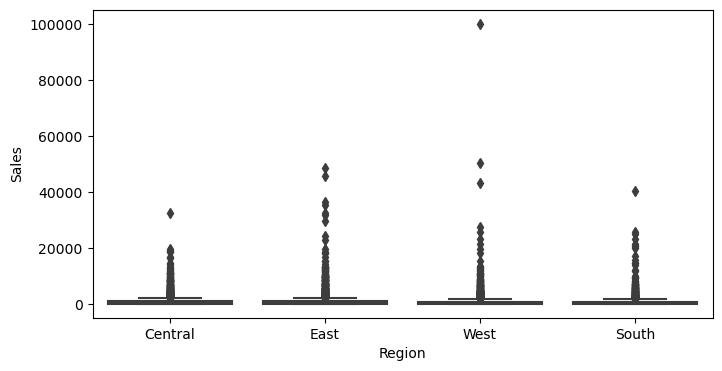

In [3]:
#Q1: Q2 in Quiz
plt.figure(figsize = (8,4))
sns.boxplot(x = 'Region', y = 'Sales', data = superstore)

In [4]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [5]:
#Q2: Q3 in Quiz
yQ2 = superstore['Sales']
State = pd.get_dummies(data = superstore.State, drop_first = True, dtype = int)
xQ2 = pd.concat([superstore['Unit Price'], State], axis = 1)
xQ2 = sm.add_constant(xQ2)

In [6]:
Q2mod = sm.OLS(yQ2, xQ2).fit()
Q2pred = Q2mod.predict(xQ2)

Q2mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     47.79
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:44:40   Log-Likelihood:                -86436.
No. Observations:                9426   AIC:                         1.730e+05
Df Residuals:                    9376   BIC:                         1.733e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  425.2673    208.786      2.037      0.042      16.001     834.534
Unit Price               3.9914      0.085     46.691      0.000       3.824       4.159
Arizona                 53.3025    297.217      0.179      0.858    -529.307     635.912
Arkansas                86.6859    299.138      0.290      0.772    -499.689     673.061
California             377.5549    224.164      1.684      0.092     -61.855     816.965
Colorado                12.3833    296.582      0.042      0.967    -568.983     593.749
Connecticut            -52.7285    241.995     -0.218      0.828    -527.091     421.634
Delaware              -408.5946    636.738     -0.642      0.521   -1656.740     839.551
District of Columbia  2409.4566    351.129      6.862      0.000    1721.167    3097.746
Florida                346.0728    240.150      1.441      0.150    -124.672     816.818
Georgia                227.1501    267.303      0.850      0.395    -296.822     751.122
Idaho                 -105.5526    301.759     -0.350      0.727    -697.067     485.961
Illinois               148.4053    320.127      0.464      0.643    -479.113     775.923
Indiana                102.9770    291.346      0.353      0.724    -468.124     674.078
Iowa                   -74.1578    279.818     -0.265      0.791    -622.661     474.345
Kansas                  92.1610    290.323      0.317      0.751    -476.936     661.258
Kentucky               -10.2953    329.966     -0.031      0.975    -657.100     636.510
Louisiana               30.0158    323.224      0.093      0.926    -603.574     663.606
Maine                   32.1239    293.062      0.110      0.913    -542.342     606.590
Maryland               -14.4443    271.982     -0.053      0.958    -547.587     518.699
Massachusetts          444.4459    222.795      1.995      0.046       7.719     881.173
Michigan               273.0363    245.103      1.114      0.265    -207.418     753.491
Minnesota               11.2557    283.054      0.040      0.968    -543.591     566.102
Mississippi           -113.3841    336.299     -0.337      0.736    -772.604     545.835
Missouri               -28.5758    277.830     -0.103      0.918    -573.184     516.032
Montana               -109.3175    336.209     -0.325      0.745    -768.361     549.726
Nebraska              -129.0205    337.636     -0.382      0.702    -790.860     532.819
Nevada                -163.2704    412.018     -0.396      0.692    -970.916     644.375
New Hampshire          -13.3632    294.805     -0.045      0.964    -591.244     564.518
New Jersey              19.1639    272.266      0.070      0.944    -514.536     552.864
New Mexico             137.5755    351.178      0.392      0.695    -550.809     825.960
New York               377.1608    234.603      1.608    

In [7]:
#Q3: Q4 in Quiz
def Positive_Profit(x): 
    if x.Profit > 0:
        return 1
    else:
        return 0

superstore['Positive_Profit'] = superstore.apply(lambda x: Positive_Profit(x), axis = 1)

In [8]:
superstore[['Positive_Profit', 'Profit']]

Positive_Profit  Profit
0                   0     -76
1                   1      52
2                   0     -22
3                   0    -350
4                   1       4
...               ...     ...
9421                0     -48
9422                0      -2
9423                1     569
9424                1      22
9425                0    -315

[9426 rows x 2 columns]

In [11]:
yQ3 = superstore.Positive_Profit
xQ3 = pd.concat([superstore['Unit Price'], State], axis = 1)

In [13]:
Q3mod = sm.Logit(yQ3, xQ3).fit()
Q3pred = Q3mod.predict(xQ3)

Q3mod.summary()

Optimization terminated successfully.
         Current function value: 0.689411
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Positive_Profit   No. Observations:                 9426
Model:                          Logit   Df Residuals:                     9377
Method:                           MLE   Df Model:                           48
Date:                Tue, 10 Oct 2023   Pseudo R-squ.:                0.004861
Time:                        18:47:40   Log-Likelihood:                -6498.4
converged:                       True   LL-Null:                       -6530.1
Covariance Type:            nonrobust   LLR p-value:                   0.06640
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Unit Price               0.0002   8.42e-05      2.854      0.004    7.53e-05       0.000
Arizona                  0.0312      0.182      0.171      0.864      -0.326       0.388
Arkansas                -0.2559      0.186     -1.379      0.168      -0.620       0.108
California              -0.0752      0.071     -1.053      0.292      -0.215       0.065
Colorado                 0.0779      0.181      0.429      0.668      -0.278       0.434
Connecticut              0.1847      0.106      1.741      0.082      -0.023       0.393
Delaware                 0.1203      0.518      0.232      0.816      -0.894       1.135
District of Columbia    -0.0819      0.243     -0.337      0.736      -0.558       0.394
Florida                 -0.0104      0.103     -0.101      0.920      -0.211       0.191
Georgia                 -0.1639      0.144     -1.137      0.256      -0.446       0.119
Idaho                    0.2189      0.189      1.157      0.247      -0.152       0.590
Illinois                -0.0185      0.209     -0.089      0.929      -0.427       0.390
Indiana                  0.2331      0.177      1.320      0.187      -0.113       0.579
Iowa                     0.1411      0.161      0.878      0.380      -0.174       0.456
Kansas                   0.2077      0.175      1.189      0.234      -0.135       0.550
Kentucky                 0.0533      0.220      0.242      0.809      -0.378       0.484
Louisiana                0.0048      0.212      0.023      0.982      -0.411       0.421
Maine                    0.0131      0.177      0.074      0.941      -0.334       0.360
Maryland                -0.1300      0.150     -0.865      0.387      -0.425       0.165
Massachusetts            0.0648      0.068      0.952      0.341      -0.069       0.198
Michigan                -0.0359      0.111     -0.324      0.746      -0.253       0.181
Minnesota                0.1601      0.166      0.967      0.334      -0.164       0.485
Mississippi             -0.3238      0.229     -1.412      0.158      -0.773       0.126
Missouri                 0.2692      0.159      1.689      0.091      -0.043       0.582
Montana                 -0.1346      0.228     -0.591      0.554      -0.581       0.312
Nebraska                -0.1442      0.228     -0.631      0.528      -0.592       0.304
Nevada                   0.4127      0.312      1.323      0.186      -0.199       1.024
New Hampshire           -0.0968      0.179     -0.540      0.589      -0.448       0.254
New Jersey              -0.2376      0.151     -1.569      0.117      -0.534       0.059
New Mexico               0.4029      0.248      1.625      0.104      -0.083       0.889
New York                 0.0355      0.093      0.383      0.702      -0.146       0.217
North Carolina          -0.0324      0.127     -0.256      0.798      -0.281       0.216
North Dakota             0.1062      0.344      0.309      0.757      -0.567       0.780
Ohio                     0.0195      